In [ ]:
# !nvidia-smi

In [ ]:
!pip install -q jupyter-black

In [ ]:
# import cudf

In [ ]:
import jupyter_black

jupyter_black.load()

<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h2>Basic Imports</h2>
</div>

In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import os

for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# torch.cuda.get_device_properties(0).total_memory / 1e9

<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h2>SpaCy</h2>
    <h4 style="color: #FFA07A">We are going to use the spacy,spacy_cleaner for cleaning of the text (It's a cython lib , which is faster in preprocessing the text)</h5>
    <h2>Spacy_Cleaner</h2>
    <h4 style="color: #FFA07A">Spacy cleaner will run upon the Spacy's pre built language model as Pipeline to make the cleaning the text very efficiently and easily</h5>
</div>


In [ ]:
!pip install spacy_cleaner

In [ ]:
import spacy
import spacy_cleaner
from spacy_cleaner.processing import removers, mutators

<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h2>Getting the Data</h2>
</div>

In [ ]:
%%time
train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h2>Analysis of data</h2>
</div>

In [ ]:
train.head(10)

In [ ]:
len(train)

In [ ]:
max(train["id"])

In [ ]:
train["keyword"].value_counts()

In [ ]:
train["location"].value_counts()

In [ ]:
train = train[train.columns[3:]]  # Removed Other columns
test = test[test.columns[3:]]

In [ ]:
train

In [ ]:
test

In [ ]:
train.dtypes

In [ ]:
train["text"] = train["text"].str.lower()
test["text"] = test["text"].str.lower()

In [ ]:
test.head(2)

In [ ]:
train.head(2)

<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h2>SpaCy's pre-built nlp model</h2>
</div>

In [ ]:
# Setting up the pipeline to clean the data using spacy
nlp = spacy.load("en_core_web_sm")
nlp

<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h2>SpaCy_Cleaner Pipeline setup</h2>
</div>

In [ ]:
pipeline = spacy_cleaner.Cleaner(
    nlp,  # pre-built language model
    removers.remove_email_token,
    removers.remove_punctuation_token,
    removers.remove_stopword_token,
    removers.remove_url_token,
    removers.remove_number_token,
    mutators.mutate_lemma_token,
)

In [ ]:
train.head(5)

<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h2>Cleaning the data</h2>
</div>

In [ ]:
%%time
train["text"] = pipeline.clean(train["text"])

In [ ]:
train.head(5)  # Now we got the clean texts

In [ ]:
# when you further check for somes senteces like train[100],[102], it will has some special characters
# let us remove the tags and unwanted symbols to make it more clean
import re

SymbolRemover = lambda x: re.sub("[#=>-<\/.]", "", x)

TagRemover = lambda word: re.sub("@\w+", "", word)

train["text"] = train["text"].apply(SymbolRemover)

train["text"] = train["text"].apply(TagRemover)

In [ ]:
# removing for test data
test["text"] = test["text"].apply(SymbolRemover)

test["text"] = test["text"].apply(TagRemover)

In [ ]:
!pip install emojis

In [ ]:
# checking in case for any emojis


def has_emoji(text):
    emoji_pattern = re.compile("[\U00010000-\U0010ffff]")
    return emoji_pattern.search(text) is not None

In [ ]:
print(train["text"].apply(has_emoji).value_counts())
print(test["text"].apply(has_emoji).value_counts()) 

In [ ]:
# So No emojis were found
# Now let's dive into the POS- Parts of Speech which is very important for meaning of the sentences
# I came to know ,when I go through some papers related the sentiment of the words given below

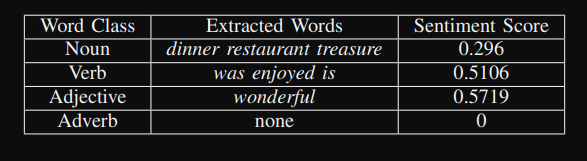

## See the Noun,Verb,Adjective has more values in determining the meaning of the sentences

https://sentic.net/sentire2021chen.pdf

In [ ]:
# so we will extract the pos from the sentences and make it combined


def extract_words(text):
    doc = nlp(text)
    verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
    adjectives = [token.lemma_ for token in doc if token.pos_ == "ADJ"]
    nouns = [token.lemma_ for token in doc if token.pos_ == "NOUN"]
    return " ".join(verbs + adjectives + nouns)

In [ ]:
# testing the fn
extract_words(train["text"][100])

In [ ]:
%%time
train["text"] = train["text"].apply(extract_words)
test["text"] = test["text"].apply(extract_words)

In [ ]:
print(train["text"][4])
print(train["target"][4])
print(test["text"][40])

In [ ]:
!ls

<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h3>Using the pre-build model from Hugging face(Transformers) for Classification</h3>
</div>

In [ ]:
# Let's write the logic for the Model in pytorch
from transformers import (
    AutoTokenizer,
    DataCollator,
    DataCollatorWithPadding,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
)
from sklearn.model_selection import train_test_split
from datasets import Dataset, load_metric

# !pip install --upgrade transformers
import os

os.environ["WANDB_DISABLED"] = "True"

<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h2>Using the "distilbert/distilbert-base-uncased" from transformers</h2>
    <a href=https://huggingface.co/transformers/v3.0.2/model_doc/auto.html#>Click to Refer for further<a>
</div>

In [ ]:
model = "distilbert/distilbert-base-uncased"
learning_rate = 2e-5
epochs = 8

In [ ]:
train_split, valid_split = train_test_split(
    train, test_size=0.2
)  # sppliting the data for train and valid

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(
    model
)  # Maping the TOkenizer for the model classification
train_ds = Dataset.from_pandas(train_split)
valid_ds = Dataset.from_pandas(valid_split)
test_ds = Dataset.from_pandas(test)


def process_token(example, tokenizer=tokenizer):
    return tokenizer(example["text"])


tokenized_train = train_ds.map(process_token)
tokenized_valid = valid_ds.map(process_token)
tokenized_test = test_ds.map(process_token)

In [ ]:
tokenized_train[0]

In [ ]:
tokenized_test[0]

In [ ]:
columns_to_remove = ["__index_level_0__"]
train_dataset = tokenized_train.remove_columns(columns_to_remove)
valid_dataset = tokenized_valid.remove_columns(columns_to_remove)
test_dataset = tokenized_test

In [ ]:
train_dataset[0]

In [ ]:
# valid_dataset[0]

In [ ]:
train_dataset = train_dataset.rename_column("target", "label")
valid_dataset = valid_dataset.rename_column("target", "label")

In [ ]:
train_dataset[0]

In [ ]:
test_dataset[0]

In [ ]:
def compute_metrics(eval_pred):
    load_acc = load_metric("accuracy")
    load_f1 = load_metric("f1")
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = load_acc.compute(predictions=predictions, references=labels)["accuracy"]
    f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
    print("Accuracy:" + acc, "F1:" + f1)
    return {"acc": acc, "f1": f1}

In [ ]:
# train_dataset

<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h2>Training the DistiltBert model</h2>
</div>

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(model)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
training_args = TrainingArguments(
    learning_rate=learning_rate,
    num_train_epochs=epochs,
    per_device_train_batch_size=16,
    weight_decay=0.01,
    output_dir="/kaggle/working/distilbert",
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.args

In [ ]:
trainer.train()

<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h2>Getting the Predictions</h2>
</div>

In [ ]:
predictions = trainer.predict(test_dataset=test_dataset)

In [ ]:
predictions.predictions[0]

In [ ]:
predictions_Strength_Class = np.argmax(
    predictions.predictions, axis=1
)  # Return the indexof the max value class

In [ ]:
predictions_Strength_Class  # Shows the label of our texts/tweets

<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h2>Making the Submission File</h2>
</div>

In [ ]:
submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
submission["target"] = predictions_Strength_Class
submission = submission.set_index("id", drop=True)
submission.to_csv("/kaggle/working/submission.csv")

In [ ]:
submission.head(5)